In [1]:
# Erasmus+ ICCT project (2018-1-SI01-KA203-047081)

%matplotlib notebook
import control as c
import ipywidgets as w
import numpy as np

from IPython.display import display, HTML
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.transforms as transforms
import matplotlib.animation as animation

# Toggle cell visibility

from IPython.display import HTML
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.input').hide()
    } else {
        $('div.input').show()
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Toggle cell visibility <a href="javascript:code_toggle()">here</a>.''')
display(tag)

# Hide the code completely

# from IPython.display import HTML
# tag = HTML('''<style>
# div.input {
#     display:none;
# }
# </style>''')
# display(tag)

## Krmiljenje sistema žoge in vzvoda

V tem interaktivnem primeru je prikazana izvedba krmiljenja sistema žoge in vzvoda. Ta sistem sestoji iz žoge ali valja, ki se kotali na vrhu ravnega vzvoda; ta rotira bodisi prek neposredne nastavitve njegovega položaja bodisi preko pogonskega mehanizma. Cilj je krmiliti pozicijo žoge na vzvodu.

<br><br>
<table><tbody><tr>
<td><center><img src="Images/bbdir.png" width="65%" /></center></td>
<td><center><img src="Images/bbmech.png" width="65%" /></center></td>
</tr>
<tr>
<td><center>Direktni pogon</center></td><td><center>Pogon s pomočjo pogonskega mehanizma</center></td>
</tr></tbody></table>
<br>
Čeprav je sistem nelinearen, s čiimer pade izven obsega klasičnega krmiljenja, lahko z linearizacijo in naborom izbranih poenostavitev sistem krmilimo blizu njegovega stacionarnega stanja. Vseeno velja poudariti, da so v primeru velikih premikov izbrane poenostavitve kršene.

Linearizirani gibalni enačbi zapišemo kot
<br>
$$\left(\frac{J}{r^2}+m\right)\cdot\ddot x=-m\cdot g\cdot\alpha\qquad\left(\frac{J}{r^2}+m\right)\cdot\ddot x=-\frac{m\cdot g\cdot d}{L}\cdot\varphi,$$
<br>
kjer je
<br>
$$J=\frac{2}{5}m\cdot r^2.$$
<br>
Po Laplaceovi transformaciji zgornjih enačb, lahko zapišemo prenosno funkcijo sistema:
<br>
$$G_{dir}(s)=-\frac{m\cdot g}{\left(\frac{J}{r^2}+m\right)\cdot s^2}\qquad G_{mech}(s)=-\frac{m\cdot g\cdot d}{L\cdot\left(\frac{J}{r^2}+m\right)\cdot s^2}$$
<br>
Tvoja naloga je, da izbereš tip krmilnika in nastaviš njegove parametre, da dosežeš sprejemljivo delovanja sistema!
<b>Najprej izberi tip sistema (direct drive ali drive through mechanism), nato pa izberi želen model!</b><br>
Oba tipa sistema sta zaradi poenostavitev formalno enaka.


<!-- The following example is a control design task for a ball and beam system. The structure consists of a ball or cylinder rolling atop of a straight beam, rotated either by direct position input or through a driving mechanism. The objective is to control the ball's position.
<br><br>
<table><tbody><tr>
<td><center><img src="Images/bbdir.png" width="65%" /></center></td>
<td><center><img src="Images/bbmech.png" width="65%" /></center></td>
</tr>
<tr>
<td><center>Direct drive</center></td><td><center>Drive through mechanism</center></td>
</tr></tbody></table>
<br>

While the system is non-linear, thus falls outside of the reach of classical control, after linearization and a set of simplifications, it is still possible to control it near to its steady state. Keep in mind, though, that results containing larger movements will violate these assumptions.

The linearized motion equations are: 
<br>
$$\left(\frac{J}{r^2}+m\right)\cdot\ddot x=-m\cdot g\cdot\alpha\qquad\left(\frac{J}{r^2}+m\right)\cdot\ddot x=-\frac{m\cdot g\cdot d}{L}\cdot\varphi$$
<br>
Where:
<br>
$$J=\frac{2}{5}m\cdot r^2$$
<br>
After the Laplace-transformation of the differential equations, the transfer functions can be expressed as:
<br>
$$G_{dir}(s)=-\frac{m\cdot g}{\left(\frac{J}{r^2}+m\right)\cdot s^2}\qquad G_{mech}(s)=-\frac{m\cdot g\cdot d}{L\cdot\left(\frac{J}{r^2}+m\right)\cdot s^2}$$
<br>
Your task is to choose a controller type, and tune it to acceptable levels of performance!

<b>First, choose a system type, then a model!</b><br>
The two types are formally equivalent due to the simplifications. -->

In [2]:
# Model selector buttons
typeSelect = w.ToggleButtons(
    options=[('Direct drive', 0), ('Drive mechanism', 1),],
    description='Tip sistema: ')

display(typeSelect)

ToggleButtons(description='Tip sistema: ', options=(('Direct drive', 0), ('Drive mechanism', 1)), value=0)

<IPython.core.display.Javascript object>


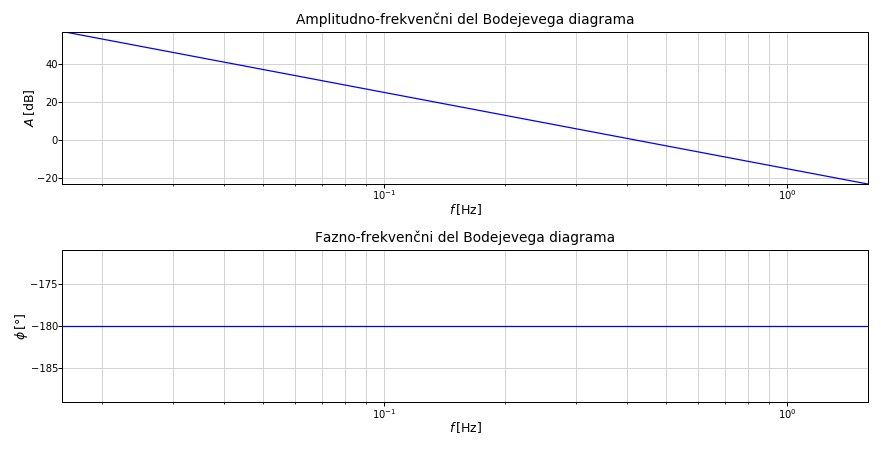

ToggleButtons(description='Sistem: ', index=6, layout=Layout(width='60%'), options=(('Model 1', 0), ('Model 2'…

Output()

Output()

In [3]:
# System parameters

g = 9.81   # m/s^2 - gravitational acceleration

# Figure definition

fig1, ((f1_ax1), (f1_ax2)) = plt.subplots(2, 1, num='Slika 1')
fig1.set_size_inches((9.8, 5))
fig1.set_tight_layout(True)

f1_line1, = f1_ax1.plot([], [])
f1_line2, = f1_ax2.plot([], [])  

f1_ax1.grid(which='both', axis='both', color='lightgray')
f1_ax2.grid(which='both', axis='both', color='lightgray')

f1_ax1.autoscale(enable=True, axis='both', tight=True)
f1_ax2.autoscale(enable=True, axis='both', tight=True)

f1_ax1.set_title('Amplitudno-frekvenčni del Bodejevega diagrama', fontsize=11)
f1_ax1.set_xscale('log')
f1_ax1.set_xlabel(r'$f\/$[Hz]', labelpad=0, fontsize=10)
f1_ax1.set_ylabel(r'$A\/$[dB]', labelpad=0, fontsize=10)
f1_ax1.tick_params(axis='both', which='both', pad=0, labelsize=8)

f1_ax2.set_title('Fazno-frekvenčni del Bodejevega diagrama', fontsize=11)
f1_ax2.set_xscale('log')
f1_ax2.set_xlabel(r'$f\/$[Hz]', labelpad=0, fontsize=10)
f1_ax2.set_ylabel(r'$\phi\/$[°]', labelpad=0, fontsize=10)
f1_ax2.tick_params(axis='both', which='both', pad=0, labelsize=8)

def build_base_model(m, r, d, L, type_select):
   
    J=2/5*m*r*r
    if type_select:
        W_sys = c.tf([m*g*d], [L*(J/(r*r)+m), 0, 0])
    else:
        W_sys = c.tf([m*g], [J/(r*r)+m, 0, 0])
    
    print('Prenosna funkcija sistema:')
    print(W_sys)
    
    # System analysis
    
    poles = c.pole(W_sys)     # Poles
    
    print('Poli sistema:\n')
    print(poles)
    
    global f1_line1, f1_line2
    
    f1_ax1.lines.remove(f1_line1)
    f1_ax2.lines.remove(f1_line2)
    
    mag, phase, omega = c.bode_plot(W_sys, Plot=False)   # Bode-plot
    
    f1_line1, = f1_ax1.plot(omega/2/np.pi, 20*np.log10(mag), lw=1, color='blue')
    f1_line2, = f1_ax2.plot(omega/2/np.pi, phase*180/np.pi, lw=1, color='blue')   
    
    f1_ax1.relim()
    f1_ax2.relim()
    f1_ax1.autoscale_view()
    f1_ax2.autoscale_view()
    
def update_sliders(index, model):
    global m_slider, r_slider, d_slider, L_slider

    mval = [0.05, 0.05, 0.1, 0.1, 0.5, 0.5, 0.25]
    rval = [0.01, 0.05, 0.05, 0.1, 0.1, 0.15, 0.075]
    dval = [0.025, 0.01, 0.05, 0.2, 0.2, 0.4, 0.2]
    Lval = [0.1, 0.1, 0.5, 1, 2, 2, 1]

    m_slider.value = mval[index]
    r_slider.value = rval[index]
    d_slider.value = dval[index]
    L_slider.value = Lval[index]
    
    if index == -1:
        m_slider.disabled = True;
        r_slider.disabled = True;
        d_slider.disabled = True;
        L_slider.disabled = True;
    else:
        m_slider.disabled = False;
        r_slider.disabled = False;
        
        if model == 0:
            d_slider.disabled = False;
            L_slider.disabled = False;
        else:
            d_slider.disabled = True;
            L_slider.disabled = True; 
    
# GUI widgets
    
typeSelect2 = w.ToggleButtons(
    options=[('Model 1', 0), ('Model 2', 1), ('Model 3', 2), ('Model 4', 3), ('Model 5', 4), ('Model 6', 5),
             ('Ponastavi', -1)],
    value=-1, description='Sistem: ', layout=w.Layout(width='60%'))

m_slider = w.FloatLogSlider(value=1, base=10, min=-2, max=1, description='$m$ [kg] :', continuous_update=False,
                            layout=w.Layout(width='auto', flex='5 5 auto'))
r_slider = w.FloatLogSlider(value=0.1, base=10, min=-3, max=0, description='$r$ [m] :', continuous_update=False,
                            layout=w.Layout(width='auto', flex='5 5 auto'))

d_slider = w.FloatLogSlider(value=0.1, base=10, min=-3, max=0, description='$d$ [m] :', continuous_update=False,
                            layout=w.Layout(width='auto', flex='5 5 auto'))
L_slider = w.FloatLogSlider(value=0, base=10, min=-1, max=2, description='$L$ [m] :', continuous_update=False,
                            layout=w.Layout(width='auto', flex='5 5 auto'))

input_data = w.interactive_output(build_base_model, {'m':m_slider, 'r':r_slider, 'd':d_slider, 'L':L_slider,
                                                     'type_select':typeSelect})  

input_data2 = w.interactive_output(update_sliders, {'index':typeSelect2, 'model':typeSelect})

display(typeSelect2, input_data2)

display(w.HBox([w.VBox([m_slider, r_slider], layout=w.Layout(width='45%')),
                w.VBox([d_slider, L_slider], layout=w.Layout(width='45%'))]), input_data)


Zaradi poenostavitev sistem obravnavamo kot idealni dvojni integracijski sistem.
<b>Ustrezno nastavi parametre krmiljenja! Katere nastavitve so najboljše za izbran sistem? Zakaj?<br>
Nastavi krmilnik tako, da bo dosežen najkrajši čas ustalitve brez prenihaja!</b>

I in D komponenti PID krmilnika lahko prosto vklapljaš/izklapljaš; če je vklopljena D komponenta, lahko uporabiš tudi filter prvega reda, ki temelji na časovni konstanti D komponente.

<!-- Due to the massive simplifications, the system is reduced to an ideal double integrator.<br>
<b>Select a fitting controller configuration! Which one is the best for your system? Why?<br>
Set up your controller for the fastest settling time with no overshoot!</b>

You can turn on/off each of the I and D components, and if D is active, you can apply the first-order filter as well, based on the derivating time constant. -->

<IPython.core.display.Javascript object>


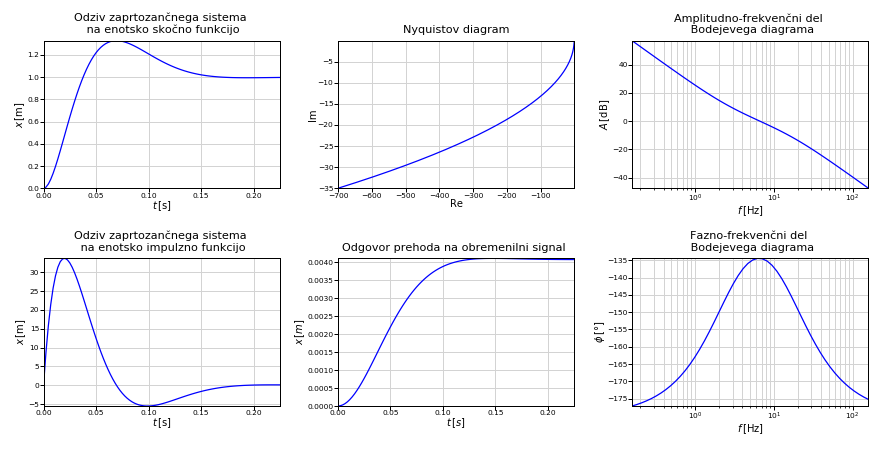

Output()

In [4]:
# PID ball balancer

fig2, ((f2_ax1, f2_ax2, f2_ax3), (f2_ax4, f2_ax5, f2_ax6)) = plt.subplots(2, 3, num='Slika 2')
fig2.set_size_inches((9.8, 5))
fig2.set_tight_layout(True)

f2_line1, = f2_ax1.plot([], [])
f2_line2, = f2_ax2.plot([], []) 
f2_line3, = f2_ax3.plot([], [])
f2_line4, = f2_ax4.plot([], [])  
f2_line5, = f2_ax5.plot([], [])
f2_line6, = f2_ax6.plot([], [])

f2_ax1.grid(which='both', axis='both', color='lightgray')
f2_ax2.grid(which='both', axis='both', color='lightgray')
f2_ax3.grid(which='both', axis='both', color='lightgray')
f2_ax4.grid(which='both', axis='both', color='lightgray')
f2_ax5.grid(which='both', axis='both', color='lightgray')
f2_ax6.grid(which='both', axis='both', color='lightgray')

f2_ax1.autoscale(enable=True, axis='both', tight=True)
f2_ax2.autoscale(enable=True, axis='both', tight=True)
f2_ax3.autoscale(enable=True, axis='both', tight=True)
f2_ax4.autoscale(enable=True, axis='both', tight=True)
f2_ax5.autoscale(enable=True, axis='both', tight=True)
f2_ax6.autoscale(enable=True, axis='both', tight=True)


f2_ax1.set_title('Odziv zaprtozančnega sistema \n na enotsko skočno funkcijo', fontsize=9)
f2_ax1.set_xlabel(r'$t\/$[s]', labelpad=0, fontsize=8)
f2_ax1.set_ylabel(r'$x\/$[m]', labelpad=0, fontsize=8)
f2_ax1.tick_params(axis='both', which='both', pad=0, labelsize=6)

f2_ax2.set_title('Nyquistov diagram', fontsize=9)
f2_ax2.set_xlabel(r'Re', labelpad=0, fontsize=8)
f2_ax2.set_ylabel(r'Im', labelpad=0, fontsize=8)
f2_ax2.tick_params(axis='both', which='both', pad=0, labelsize=6)

f2_ax3.set_title('Amplitudno-frekvenčni del \n Bodejevega diagrama', fontsize=9)
f2_ax3.set_xscale('log')
f2_ax3.set_xlabel(r'$f\/$[Hz]', labelpad=0, fontsize=8)
f2_ax3.set_ylabel(r'$A\/$[dB]', labelpad=0, fontsize=8)
f2_ax3.tick_params(axis='both', which='both', pad=0, labelsize=6)

f2_ax4.set_title('Odziv zaprtozančnega sistema \n na enotsko impulzno funkcijo', fontsize=9)
f2_ax4.set_xlabel(r'$t\/$[s]', labelpad=0, fontsize=8)
f2_ax4.set_ylabel(r'$x\/$[m]', labelpad=0, fontsize=8)
f2_ax4.tick_params(axis='both', which='both', pad=0, labelsize=6)

f2_ax5.set_title('Odgovor prehoda na obremenilni signal ', fontsize=9)
f2_ax5.set_xlabel(r'$t\/[s]$', labelpad=0, fontsize=8)
f2_ax5.set_ylabel(r'$x\/[m]$', labelpad=0, fontsize=8)
f2_ax5.tick_params(axis='both', which='both', pad=0, labelsize=6)

f2_ax6.set_title('Fazno-frekvenčni del \n Bodejevega diagrama', fontsize=9)
f2_ax6.set_xscale('log')
f2_ax6.set_xlabel(r'$f\/$[Hz]', labelpad=0, fontsize=8)
f2_ax6.set_ylabel(r'$\phi\/$[°]', labelpad=0, fontsize=8)
f2_ax6.tick_params(axis='both', which='both', pad=0, labelsize=6)

def position_control(Kp, Ti, Td, Fd, Ti0, Td0, m, r, d, L, type_select):
    
    J=2/5*m*r*r
    if type_select:
        W_sys = c.tf([m*g*d], [L*(J/(r*r)+m), 0, 0])
    else:
        W_sys = c.tf([m*g], [J/(r*r)+m, 0, 0])
    
    # PID Controller
    
    P = Kp             # Proportional term
    I = Kp / Ti        # Integral term
    D = Kp * Td        # Derivative term
    Td_f = Td / Fd     # Derivative term filter
    
    W_PID = c.parallel(c.tf([P], [1]),
                       c.tf([I * Ti0], [1 * Ti0, 1 * (not Ti0)]),
                       c.tf([D * Td0, 0], [Td_f * Td0, 1]))  # PID controller in time constant format
    
    W_open = c.series(W_PID, W_sys)         # Open loop 
    W_closed = c.feedback(W_open, 1, -1)    # Closed loop with negative feedback
    
    if type_select:   # Disturbance transfer
        W_load = c.feedback (c.tf([1], [J/r/r+m, 0, 0]), c.series(c.tf([m*g*d], [L]), W_PID), -1)  
    else:
        W_load = c.feedback (c.tf([1], [J/r/r+m, 0, 0]), c.series(c.tf([m*g], [1]), W_PID), -1)
                        
    # Display
    
    global f2_line1, f2_line2, f2_line3, f2_line4, f2_line5, f2_line6
    
    f2_ax1.lines.remove(f2_line1)
    f2_ax2.lines.remove(f2_line2)
    f2_ax3.lines.remove(f2_line3)
    f2_ax4.lines.remove(f2_line4)
    f2_ax5.lines.remove(f2_line5)
    f2_ax6.lines.remove(f2_line6)
    
    tout, yout = c.step_response(W_closed)
    f2_line1, = f2_ax1.plot(tout, yout, lw=1, color='blue')
    
    _, _, ob = c.nyquist_plot(W_open, Plot=False)   # Small resolution plot to determine bounds        
    real, imag, freq = c.nyquist_plot(W_open, omega=np.logspace(np.log10(ob[0]), np.log10(ob[-1]), 1000), Plot=False)     
    f2_line2, = f2_ax2.plot(real, imag, lw=1, color='blue')
    
    mag, phase, omega = c.bode_plot(W_open, Plot=False)
    f2_line3, = f2_ax3.plot(omega/2/np.pi, 20*np.log10(mag), lw=1, color='blue')
    f2_line6, = f2_ax6.plot(omega/2/np.pi, phase*180/np.pi, lw=1, color='blue')
    
    tout, yout = c.impulse_response(W_closed)
    f2_line4, = f2_ax4.plot(tout, yout, lw=1, color='blue')
    
    tout, yout = c.step_response(W_load)
    f2_line5, = f2_ax5.plot(tout, yout, lw=1, color='blue')
    
    f2_ax1.relim()
    f2_ax2.relim()
    f2_ax3.relim()
    f2_ax4.relim()
    f2_ax5.relim()
    f2_ax6.relim()
    f2_ax1.autoscale_view()
    f2_ax2.autoscale_view()
    f2_ax3.autoscale_view()
    f2_ax4.autoscale_view()
    f2_ax5.autoscale_view()
    f2_ax6.autoscale_view()
    
def update_controller(index):
    global Kp_slider, Ti_slider, Td_slider, Fd_slider, Ti_button, Td_button
    
    if index == -1:
        Kp_slider.value = 100
        Td_slider.value = 0.05
        Fd_slider.value = 5
        Ti_button.value = False
        Td_button.value = True
        
        Kp_slider.disabled = True
        Ti_slider.disabled = True
        Td_slider.disabled = True
        Fd_slider.disabled = True
        Ti_button.disabled = True
        Td_button.disabled = True
    else:
        Kp_slider.disabled = False
        Ti_slider.disabled = False
        Td_slider.disabled = False
        Fd_slider.disabled = False
        Ti_button.disabled = False
        Td_button.disabled = False

# GUI widgets

Kp_slider = w.FloatLogSlider(value=2, base=10, min=-3, max=5, description='Kp:', continuous_update=False,
                             layout=w.Layout(width='auto', flex='5 5 auto'))
Ti_slider = w.FloatLogSlider(value=0.0035, base=10, min=-4, max=1, description='', continuous_update=False,
                             layout=w.Layout(width='auto', flex='5 5 auto'))
Td_slider = w.FloatLogSlider(value=0.25, base=10, min=-4, max=1, description='', continuous_update=False,
                             layout=w.Layout(width='auto', flex='5 5 auto'))
Fd_slider = w.FloatLogSlider(value=1, base=10, min=0, max=3, description='', continuous_update=False,
                             layout=w.Layout(width='auto', flex='5 5 auto'))

Ti_button = w.ToggleButton(value=False, description='Ti',
                           layout=w.Layout(width='auto', flex='1 1 0%'))
Td_button = w.ToggleButton(value=True, description='Td',
                           layout=w.Layout(width='auto', flex='1 1 0%'))

input_data = w.interactive_output(position_control, {'Kp': Kp_slider, 'Ti': Ti_slider, 'Td': Td_slider,
                                                     'Fd': Fd_slider, 'Ti0' : Ti_button, 'Td0': Td_button,
                                                     'm':m_slider, 'r':r_slider,
                                                     'd':d_slider, 'L':L_slider, 'type_select':typeSelect})

w.interactive_output(update_controller, {'index': typeSelect2})

display(w.HBox([Kp_slider, Ti_button, Ti_slider, Td_button, Td_slider, Fd_slider]), input_data)

V spodnji simulaciji lahko opazuješ gibanje sistema glede na nastavitve izbranega krmilnika. Dodatno lahko spremeniš referenčni signal in dodaš motnjo; opazuj, kako se sistem odzove.

<b>Ali je izbrana nastavitev ustrezna za sledenje vstopnemu signalu? Prilagodi krmilnik tako, da bo sprejemljivo sledil sinusnemu valu!</b>
<br><br>
<i>(Animacija je prilagojena na način, da se znotraj enega simulacijskega cikla (prikazan na diagramu) odziv sistema ne spreminja. Zaradi tega se, ob spremembi nastavitev PID krmilnika, nestabilne rešitve pokažejo šele v zadnji sekundi simulacijskega cikla.)</i>

<!-- In the following simulation, you can observe the movement of your system based on your controller setup. You can create reference signals and even apply some disturbance and see how the system reacts.

<b>Is your configuration suitable for signal-following? Readjust your controller so that it can follow a sine wave acceptably!</b>
<br><br>
<i>(The animations are scaled to fit the frame through the whole simulation. Because of this, unstable solutions might not seem to move until the very last second.)</i> -->

<IPython.core.display.Javascript object>


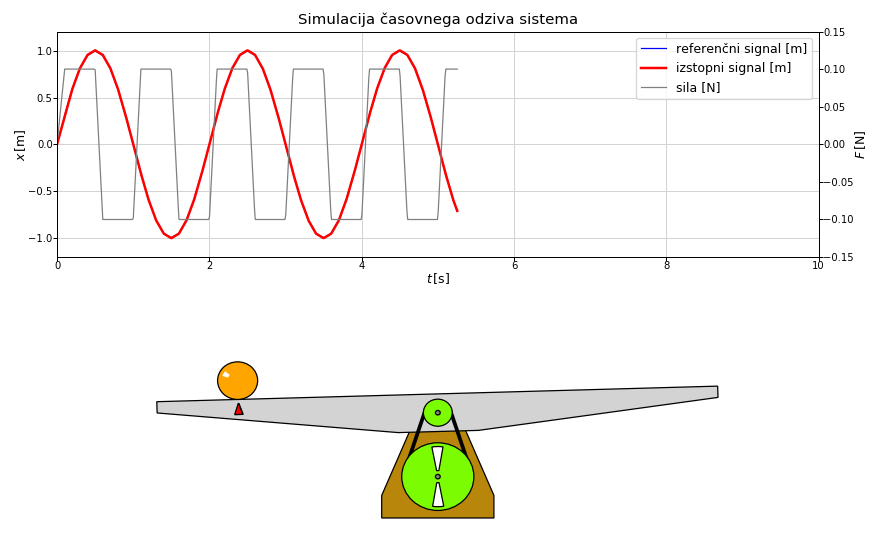

Output()

In [5]:
# Simulation

anim_fig = plt.figure(num='Animacija 1')
anim_fig.set_size_inches((9.8, 6))
anim_fig.set_tight_layout(True)

anim_ax1 = anim_fig.add_subplot(211)
anim_ax2 = anim_ax1.twinx()

frame_count=1000

l1 = anim_ax1.plot([], [], lw=1, color='blue')
l2 = anim_ax1.plot([], [], lw=2, color='red')
l3 = anim_ax2.plot([], [], lw=1, color='grey')

line1 = l1[0]
line2 = l2[0]
line3 = l3[0]

anim_ax1.legend(l1+l2+l3, ['referenčni signal [m]', 'izstopni signal [m]', 'sila [N]'], loc=1)

anim_ax1.set_title('Simulacija časovnega odziva sistema', fontsize=12)
anim_ax1.set_xlabel(r'$t\/$[s]', labelpad=0, fontsize=10)
anim_ax1.set_ylabel(r'$x\/$[m]', labelpad=0, fontsize=10)
anim_ax1.tick_params(axis='both', which='both', pad=0, labelsize=8)
anim_ax2.set_ylabel(r'$F\/$[N]', labelpad=0, fontsize=10)
anim_ax2.tick_params(axis='both', which='both', pad=0, labelsize=8)

anim_ax1.grid(which='both', axis='both', color='lightgray')

T_plot = []
X_plot = []
D_plot = []
R_plot = []
P_plot = []

# Scene data

scene_ax = anim_fig.add_subplot(212)
scene_ax.set_xlim((-4.75, 4.75))
scene_ax.set_ylim((-1.5, 1.5))
scene_ax.axis('off')

rotation_transform = transforms.Affine2D()

scene_ax.add_patch(patches.Polygon(np.stack(([-3.5, -3.5, -0.5, 0.5, 3.5, 3.5, -3.5],
                                   [0.25, 0.1, -0.25, -0.25, 0.1, 0.25, 0.25])).T,
                                   fill = True, lw=1, ec='black', fc='lightgray', zorder=5,
                                   transform=rotation_transform + scene_ax.transData))
scene_ax.add_patch(patches.Polygon(np.stack(([-0.7, -0.7, 0.7, 0.7, 0.25, -0.25, -0.7],
                                   [-1.1, -1.4, -1.4, -1.1, 0, 0, -1.1])).T,
                                   fill = True, lw=1, ec='black', fc='darkgoldenrod', zorder=0))
scene_ax.add_patch(patches.Circle((0, 0), fill=True, radius=0.03, ec='black', fc='gray', lw=1, zorder=20))

ball = patches.Circle((0, 0.5), fill=True, radius=0.25, ec='black', fc='orange', lw=1,
                      zorder=5, transform=rotation_transform + scene_ax.transData)
gleam = patches.Wedge((0, 0.5), 0.2, fill=True, width=0.075, theta1=215, theta2=235, lw=0,
                      ec='white', fc='white', zorder=10, transform=rotation_transform + scene_ax.transData)

scene_ax.add_patch(ball)
scene_ax.add_patch(gleam)

center_drive_belt, = scene_ax.plot([-0.42, -0.15, 0.15, 0.42], [-0.8, 0.05, 0.05, -0.8], color='black', lw=3, zorder=10)

center_drive_1 = patches.Circle((0, 0), fill=True, radius=0.18, ec='black', fc='lawngreen', lw=1, zorder=15)
center_drive_2 = patches.Circle((0, -0.85), fill=True, radius=0.45, ec='black', fc='lawngreen', lw=1, zorder=15)
center_drive_shaft = patches.Circle((0, -0.85), fill=True, radius=0.03, ec='black', fc='gray', lw=1, zorder=25)
center_drive_mark_1 = patches.Wedge((0, -0.85), 0.40, theta1=260, theta2=280, width=0.32,
                                    fill=True, ec='black', fc='white', lw=1, zorder=20)
center_drive_mark_2 = patches.Wedge((0, -0.85), 0.40, theta1=80, theta2=100, width=0.32,
                                    fill=True, ec='black', fc='white', lw=1, zorder=20)

scene_ax.add_patch(center_drive_1)
scene_ax.add_patch(center_drive_2)
scene_ax.add_patch(center_drive_shaft)
scene_ax.add_patch(center_drive_mark_1)
scene_ax.add_patch(center_drive_mark_2)

wheel_transform = transforms.Affine2D()

drive_rod_outline, = scene_ax.plot([3.5, 3.4], [-0.85, 0.175], color='black', solid_capstyle='round', lw=8, zorder=15,
                                   visible=False)
drive_rod, = scene_ax.plot([3.5, 3.4], [-0.85, 0.175], color='deepskyblue', solid_capstyle='round', lw=6, zorder=20,
                           visible=False)
drive_wheel_rod_outline, = scene_ax.plot([3.05, 3.5], [-0.85, -0.85], color='black', solid_capstyle='round', lw=12, zorder=0,
                                         visible=False)
drive_wheel_rod, = scene_ax.plot([3.05, 3.5], [-0.85, -0.85], color='cyan', solid_capstyle='round', lw=10, zorder=10,
                                 visible=False)
drive_motor_grate, = scene_ax.plot([2.5, 2.5, 2.5833, 2.5833, 2.6666, 2.6666, 2.75],
                                   [-1, -1.25, -1, -1.25, -1, -1.25, -1],
                                   color='black', solid_capstyle='round', lw=1, zorder=5, visible=False)

drive_rod_p1 = patches.Circle((3.4, 0.175), fill=True, radius=0.03, ec='black', fc='gray', lw=1, zorder=25,
                              transform=rotation_transform + scene_ax.transData, visible=False)
drive_rod_p2 = patches.Circle((3.5, -0.85), fill=True, radius=0.03, ec='black', fc='gray', lw=1, zorder=25,
                              transform=wheel_transform + scene_ax.transData, visible=False)
drive_wheel = patches.Circle((3.05, -0.85), fill=True, radius=0.25, ec='black', fc='cyan', lw=1, zorder=5, visible=False)
drive_wheel_p = patches.Circle((3.05, -0.85), fill=True, radius=0.03, ec='black', fc='gray', lw=1, zorder=25, visible=False)
drive_motor = patches.Polygon(np.stack(([2.3, 3.2, 3.2, 2.6, 2.3, 2.3],
                              [-1.4, -1.4, -0.7, -0.7, -0.85, -1.4])).T,
                               fill = True, lw=1, ec='black', fc='firebrick', zorder=0, visible=False)

scene_ax.add_patch(drive_rod_p1)
scene_ax.add_patch(drive_rod_p2)
scene_ax.add_patch(drive_wheel)
scene_ax.add_patch(drive_wheel_p)
scene_ax.add_patch(drive_motor)

x_arrow = scene_ax.arrow(0, 0.05, 0, 0.15, ec='black', fc='blue', head_width=0.1,
                         length_includes_head=True, lw=1, fill=True, zorder=10,
                         transform=rotation_transform + scene_ax.transData)
r_arrow = scene_ax.arrow(0, 0.05, 0, 0.15, ec='black', fc='red', head_width=0.1,
                         length_includes_head=True, lw=1, fill=True, zorder=10,
                         transform=rotation_transform + scene_ax.transData)
base_arrow = x_arrow.xy


rot_pos = []
ball_pos = []
ref_pos = []
ball_rot = []
sys_type = 0

#Simulation function

def simulation(Kp, Ti, Td, Fd, Ti0, Td0, m, r, d, L, type_select, T, dt, X, Xf, Xa, Xo, F, Ff, Fa, Fo):
    
    # Controller
    P = Kp            # Proportional term
    I = Kp / Ti       # Integral term
    D = Kp * Td       # Derivative term
    Td_f = Td / Fd    # Derivative term filter
    
    W_PID = c.parallel(c.tf([P], [1]),
                       c.tf([I * Ti0], [1 * Ti0, 1 * (not Ti0)]),
                       c.tf([D * Td0, 0], [Td_f * Td0, 1]))  # PID controller
    
    # System
    
    J=2/5*m*r*r
    if type_select:
        W_sys = c.tf([m*g*d], [L*(J/(r*r)+m), 0, 0])
    else:
        W_sys = c.tf([m*g], [J/(r*r)+m, 0, 0])
    
    # Model
    W_open = c.series(W_PID, W_sys)         # Open loop 
    W_closed = c.feedback(W_open, 1, -1)    # Closed loop with negative feedback
    
    if type_select:   # Disturbance transfer
        W_s1 = c.tf([m*g*d], [L])
    else:
        W_s1 = c.tf([m*g], [1])
        
    W_s2 = c.tf([1], [J/r/r+m, 0, 0])
    W_load = c.feedback(W_s2, c.series(W_PID, W_s1), -1)
    
    W_cont_sys = c.feedback(W_PID, W_sys, -1)    # Control signal (angle) system component
    W_cont_load = c.feedback(c.series(W_s2, c.negate(W_PID)), W_s1, 1)     # Control signal (angle) load component         
    
    # Reference and disturbance signals

    T_sim = np.arange(0, T, dt, dtype=np.float64)
    
    if X == 0:     # Constant reference
        X_sim = np.full_like(T_sim, Xa * Xo)
    elif X == 1:   # Sine wave reference
        X_sim = (np.sin(2 * np.pi * Xf * T_sim) + Xo) * Xa
    elif X == 2:   # Square wave reference
        X_sim = (np.sign(np.sin(2 * np.pi * Xf * T_sim)) + Xo) * Xa
        
    if F == 0:     # Constant load
        F_sim = np.full_like(T_sim, Fa * Fo)
    elif F == 1:   # Sine wave load
        F_sim = (np.sin(2 * np.pi * Ff * T_sim) + Fo) * Fa
    elif F == 2:   # Square wave load
        F_sim = (np.sign(np.sin(2 * np.pi * Ff * T_sim)) + Fo) * Fa
    elif F == 3:   # Noise form load
        F_sim = np.interp(T_sim, np.linspace(0, T, int(T * Ff) + 2),
                          np.random.normal(loc=(Fo * Fa), scale=Fa, size=int(T * Ff) + 2))
    
    # System response
        
    Tx, youtx, xoutx = c.forced_response(W_closed, T_sim, X_sim)
    Tf, youtf, xoutf = c.forced_response(W_load, T_sim, F_sim)
    R_sim = np.nan_to_num(youtx + youtf)
                    
    Tcx, youtcx, xoutcx = c.forced_response(W_cont_sys, T_sim, X_sim)
    Tcf, youtcf, xoutcf = c.forced_response(W_cont_load, T_sim, F_sim)
    P_sim = np.nan_to_num(youtcx + youtcf)
    
    # Display
            
    XR_max = max(np.amax(np.absolute(np.concatenate((X_sim, R_sim)))), Xa)
    F_max = max(np.amax(np.absolute(F_sim)), Fa)
    P_max = np.amax(np.absolute(P_sim))
    
    anim_ax1.set_xlim((0, T))
    anim_ax1.set_ylim((-1.2 * XR_max, 1.2 * XR_max))
    anim_ax2.set_ylim((-1.5 * F_max, 1.5 * F_max))
    
    global T_plot, X_plot, F_plot, R_plot, P_plot, rot_pos, ball_pos, ref_pos, ball_rot, sys_type
    
    T_plot = np.linspace(0, T, frame_count, dtype=np.float32)
    X_plot = np.interp(T_plot, T_sim, X_sim)
    F_plot = np.interp(T_plot, T_sim, F_sim)
    R_plot = np.interp(T_plot, T_sim, R_sim)
    P_plot = np.interp(T_plot, T_sim, P_sim)
                    
    rot_pos = P_plot / P_max * -10   # The constant sets the apparent maximal tilt of the animation in degrees
    ball_pos = R_plot / XR_max * 3.4
    ref_pos = X_plot / XR_max * 3.4
    ball_rot = ball_pos / np.pi * -360
    sys_type = type_select
    

def anim_init():
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    
    ball.set_center((0, 0.5))
    gleam.set_center((0, 0.5))
    gleam.set_theta1(215)
    gleam.set_theta2(235)
    
    center_drive_mark_1.set_theta1(260)
    center_drive_mark_1.set_theta2(280)
    center_drive_mark_2.set_theta1(80)
    center_drive_mark_2.set_theta2(100)
    
    drive_rod_outline.set_data([3.5, 3.4], [-0.85, 0.175])
    drive_rod.set_data([3.5, 3.4], [-0.85, 0.175])
    drive_wheel_rod_outline.set_data([3.05, 3.5], [-0.85, -0.85])
    drive_wheel_rod.set_data([3.05, 3.5], [-0.85, -0.85])
    
    x_arrow.set_xy(base_arrow)
    r_arrow.set_xy(base_arrow)
    
    rotation_transform.clear()
    wheel_transform.clear()
    
    if sys_type:
        center_drive_1.set_visible(False)
        center_drive_2.set_visible(False)
        center_drive_shaft.set_visible(False)
        center_drive_belt.set_visible(False)
        center_drive_mark_1.set_visible(False)
        center_drive_mark_2.set_visible(False)
        
        drive_rod.set_visible(True)
        drive_rod_outline.set_visible(True)
        drive_wheel_rod.set_visible(True)
        drive_wheel_rod_outline.set_visible(True)
        drive_wheel.set_visible(True)
        drive_motor.set_visible(True)
        drive_rod_p1.set_visible(True)
        drive_rod_p2.set_visible(True)
        drive_wheel_p.set_visible(True)
        drive_motor_grate.set_visible(True)
        
    else:
        center_drive_1.set_visible(True)
        center_drive_2.set_visible(True)
        center_drive_shaft.set_visible(True)
        center_drive_belt.set_visible(True)
        center_drive_mark_1.set_visible(True)
        center_drive_mark_2.set_visible(True)
        
        drive_rod.set_visible(False)
        drive_rod_outline.set_visible(False)
        drive_wheel_rod.set_visible(False)
        drive_wheel_rod_outline.set_visible(False)
        drive_wheel.set_visible(False)
        drive_motor.set_visible(False)
        drive_rod_p1.set_visible(False)
        drive_rod_p2.set_visible(False)
        drive_wheel_p.set_visible(False)
        drive_motor_grate.set_visible(False)
    
    return (line1, line2, line3, ball, gleam, x_arrow, r_arrow, center_drive_1, center_drive_2,
            center_drive_shaft, center_drive_belt, center_drive_mark_1, center_drive_mark_2,
            drive_rod_outline, drive_rod, drive_wheel_rod_outline, drive_wheel_rod, drive_wheel, drive_motor,
            drive_rod_p1, drive_rod_p2, drive_wheel_p, drive_motor_grate,)

def animate(i):
    line1.set_data(T_plot[0:i], X_plot[0:i])
    line2.set_data(T_plot[0:i], R_plot[0:i])
    line3.set_data(T_plot[0:i], F_plot[0:i])
    
    ball.set_center((ball_pos[i], 0.5))
    gleam.set_center((ball_pos[i], 0.5))
    gleam.set_theta1(215 + ball_rot[i])
    gleam.set_theta2(235 + ball_rot[i])
    
    if sys_type:
        center_drive_1.set_visible(False)
        center_drive_2.set_visible(False)
        center_drive_shaft.set_visible(False)
        center_drive_belt.set_visible(False)
        center_drive_mark_1.set_visible(False)
        center_drive_mark_2.set_visible(False)
        
        drive_rod.set_visible(True)
        drive_rod_outline.set_visible(True)
        drive_wheel_rod.set_visible(True)
        drive_wheel_rod_outline.set_visible(True)
        drive_wheel.set_visible(True)
        drive_motor.set_visible(True)
        drive_rod_p1.set_visible(True)
        drive_rod_p2.set_visible(True)
        drive_wheel_p.set_visible(True)
        drive_motor_grate.set_visible(True)
        
    else:
        center_drive_1.set_visible(True)
        center_drive_2.set_visible(True)
        center_drive_shaft.set_visible(True)
        center_drive_belt.set_visible(True)
        center_drive_mark_1.set_visible(True)
        center_drive_mark_2.set_visible(True)
        
        drive_rod.set_visible(False)
        drive_rod_outline.set_visible(False)
        drive_wheel_rod.set_visible(False)
        drive_wheel_rod_outline.set_visible(False)
        drive_wheel.set_visible(False)
        drive_motor.set_visible(False)
        drive_rod_p1.set_visible(False)
        drive_rod_p2.set_visible(False)
        drive_wheel_p.set_visible(False)
        drive_motor_grate.set_visible(False)
        
    
    center_drive_mark_1.set_theta1(260 + rot_pos[i] / 2.5)
    center_drive_mark_1.set_theta2(280 + rot_pos[i] / 2.5)
    center_drive_mark_2.set_theta1(80 + rot_pos[i] / 2.5)
    center_drive_mark_2.set_theta2(100 + rot_pos[i] / 2.5)
    
    x_arrow.set_xy(base_arrow + [ref_pos[i], 0])
    r_arrow.set_xy(base_arrow + [ball_pos[i], 0])
    
    rotation_transform.clear().rotate_deg_around(0, 0, rot_pos[i])
    wheel_transform.clear().rotate_deg_around(3.05, -0.85, rot_pos[i] * 9)
    
    drive_rod_outline.set_data(np.stack((wheel_transform.transform_point([3.5, -0.85]),
                               rotation_transform.transform_point([3.4, 0.175]))).T)
    drive_rod.set_data(np.stack((wheel_transform.transform_point([3.5, -0.85]),
                                 rotation_transform.transform_point([3.4, 0.175]))).T)
    drive_wheel_rod_outline.set_data(np.stack(([3.05, -0.85], wheel_transform.transform_point([3.5, -0.85]))).T)
    drive_wheel_rod.set_data(np.stack(([3.05, -0.85], wheel_transform.transform_point([3.5, -0.85]))).T)
    
    return (line1, line2, line3, ball, gleam, x_arrow, r_arrow, center_drive_1, center_drive_2,
            center_drive_shaft, center_drive_belt, center_drive_mark_1, center_drive_mark_2,
            drive_rod_outline, drive_rod, drive_wheel_rod_outline, drive_wheel_rod, drive_wheel, drive_motor,
            drive_rod_p1, drive_rod_p2, drive_wheel_p, drive_motor_grate,)

anim = animation.FuncAnimation(anim_fig, animate, init_func=anim_init,
                               frames=frame_count, interval=10, blit=True,
                               repeat=True)

# Controllers

T_slider = w.FloatLogSlider(value=10, base=10, min=-0.7, max=1, step=0.01,
                            description='trajanje [s]:', continuous_update=False,
                            orientation='vertical', layout=w.Layout(width='auto', height='auto', flex='1 1 auto'))

dt_slider = w.FloatLogSlider(value=0.1, base=10, min=-3, max=-1, step=0.01,
                             description='časovni korak [s]:', continuous_update=False,
                             orientation='vertical', layout=w.Layout(width='auto', height='auto', flex='1 1 auto'))
style = {'description_width': 'initial'}       
X_type = w.Dropdown(options=[('konstantna funkcija', 0), ('sinusni val', 1), ('kvadratni val', 2)], value=1,
                     description='Referenčni signal: ', continuous_update=False, style=style, layout=w.Layout(width='auto', flex='3 3 auto'))    
Xf_slider = w.FloatLogSlider(value=0.5, base=10, min=-2, max=2, step=0.01,
                             description='frekvenca [Hz]:', continuous_update=False,
                             orientation='vertical', layout=w.Layout(width='auto', height='auto', flex='1 1 auto'))
Xa_slider = w.FloatLogSlider(value=1, base=10, min=-2, max=2, step=0.01,
                             description='amplituda [m]:', continuous_update=False,
                             orientation='vertical', layout=w.Layout(width='auto', height='auto', flex='1 1 auto'))
Xo_slider = w.FloatSlider(value=0, min=-10, max=10, description='x0:', continuous_update=False,
                              orientation='vertical', layout=w.Layout(width='auto', height='auto', flex='1 1 auto'))    
    
F_type = w.Dropdown(options=[('konstanta funkcija', 0), ('sinusni val', 1), ('kvadratni val', 2), ('šum', 3)], value=2,
                     description='Motnja: ', continuous_update=False, layout=w.Layout(width='auto', flex='3 3 auto'))    
Ff_slider = w.FloatLogSlider(value=1, base=10, min=-2, max=2, step=0.01,
                             description='frekvenca [Hz]:', continuous_update=False,
                             orientation='vertical', layout=w.Layout(width='auto', height='auto', flex='1 1 auto'))
Fa_slider = w.FloatLogSlider(value=0.1, base=10, min=-2, max=2, step=0.01,
                             description='amplituda [N]:', continuous_update=False,
                             orientation='vertical', layout=w.Layout(width='auto', height='auto', flex='1 1 auto'))
Fo_slider = w.FloatSlider(value=0, min=-10, max=10, description='F0:', continuous_update=False,
                              orientation='vertical', layout=w.Layout(width='auto', height='auto', flex='1 1 auto'))

input_data = w.interactive_output(simulation, {'Kp': Kp_slider, 'Ti': Ti_slider, 'Td': Td_slider,
                                               'Fd': Fd_slider, 'Ti0' : Ti_button, 'Td0': Td_button,
                                               'm':m_slider, 'r':r_slider, 'd':d_slider, 'L':L_slider,
                                               'type_select':typeSelect,
                                               'T': T_slider, 'dt': dt_slider,
                                               'X': X_type, 'Xf': Xf_slider, 'Xa': Xa_slider, 'Xo': Xo_slider,
                                               'F': F_type, 'Ff': Ff_slider, 'Fa': Fa_slider, 'Fo': Fo_slider})

display(w.HBox([w.HBox([T_slider, dt_slider], layout=w.Layout(width='25%')),
                w.Box([], layout=w.Layout(width='5%')),
                w.VBox([X_type, w.HBox([Xf_slider, Xa_slider, Xo_slider])], layout=w.Layout(width='30%')),
                w.Box([], layout=w.Layout(width='5%')),
                w.VBox([F_type, w.HBox([Ff_slider, Fa_slider, Fo_slider])], layout=w.Layout(width='30%'))],
                layout=w.Layout(width='100%', justify_content='center')), input_data)

Parameter *trajanje* vpliva na prikaz simulacije, parameter *časovni korak* pa vpliva na frekvenco vzročenja in s tem izboljša rezultat, a na račun povečane računske moči.

<!-- The duration parameter controls the simulated timeframe and does not affect the runtime of the animation. In contrast, the timestep controls the model sampling and can refine the results in exchange for higher computational resources. -->